<a href="https://colab.research.google.com/github/itsdj20/Machine-Learning-Projects/blob/master/Walmart%20Sales%20Forecsting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv


In [4]:
import io
ft = pd.read_csv(io.StringIO(uploaded['features.csv'].decode('utf-8')))
ft.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
ft.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
from statistics import mean
ft.CPI=ft.CPI.fillna(mean(ft.CPI))
ft.Unemployment=ft.Unemployment.fillna(mean(ft.Unemployment))
ft.MarkDown1=ft.MarkDown1.fillna(0)
ft.MarkDown2=ft.MarkDown2.fillna(0)
ft.MarkDown3=ft.MarkDown3.fillna(0)
ft.MarkDown4=ft.MarkDown4.fillna(0)
ft.MarkDown5=ft.MarkDown5.fillna(0)
ft.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [8]:
path_train=files.upload()

Saving train.csv to train.csv


In [10]:
train_data=pd.read_csv(io.StringIO(path_train['train.csv'].decode('utf-8')))
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [0]:
merge_data=pd.merge(ft,train_data,on=['Store','Date','IsHoliday'],how='inner')

In [12]:
path_stores=files.upload()

Saving stores.csv to stores.csv


In [13]:
stores_data=pd.read_csv(io.StringIO(path_stores['stores.csv'].decode('utf-8')))
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [0]:
final_data=pd.merge(merge_data,stores_data,how='inner',on='Store')


In [15]:
final_data=final_data.sort_values(by='Date')
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681


In [16]:
sizes=stores_data.groupby("Type").count()
sizes['Size']

Type
A    22
B    17
C     6
Name: Size, dtype: int64

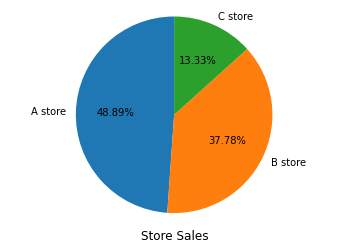

In [17]:
import matplotlib.pyplot as plt
store_label = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]

plot_pie,ax1 =plt.subplots()
ax1.pie(sizes,labels=store_label,startangle=90,autopct='%1.2f%%')
ax1.axis('equal')
plt.title("Store Sales",y=-0.1)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


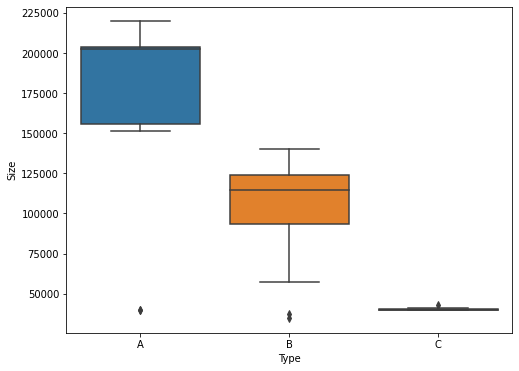

In [18]:
import seaborn as sns
store_type = pd.concat([stores_data['Type'], stores_data['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

In [19]:
print('sales on non-holiday : ',final_data[final_data['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',final_data[final_data['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


In [20]:
final_data['Year']=pd.to_datetime(final_data['Date'],format="%Y-%m-%d").dt.year
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681,2010
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681,2010
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681,2010
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681,2010


In [21]:
test_path=files.upload()

Saving test.csv to test.csv


In [22]:
final_test_data=pd.read_csv(io.StringIO(test_path['test.csv'].decode('utf-8')))
final_test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,11/2/2012,False
1,1,1,11/9/2012,False
2,1,1,11/16/2012,False
3,1,1,11/23/2012,True
4,1,1,11/30/2012,False


In [23]:
final_test_data['Year']=pd.to_datetime(final_test_data['Date'],format="%m/%d/%Y").dt.year
final_test_data.head()

,Store,Dept,Date,IsHoliday,Year
0,1,1,11/2/2012,False,2012
1,1,1,11/9/2012,False,2012
2,1,1,11/16/2012,False,2012
3,1,1,11/23/2012,True,2012
4,1,1,11/30/2012,False,2012


In [24]:
final_data["Day"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.day
final_test_data["Day"] = pd.to_datetime(final_test_data["Date"], format="%m/%d/%Y").dt.day
final_data.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681,2010,5
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681,2010,5
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681,2010,5
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681,2010,5


In [25]:
final_data["Days to Next Holiday"] = (pd.to_datetime(final_data["Year"].astype(str)+"-12-31",format="%Y-%m-%d") - pd.to_datetime(final_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Holiday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329


In [0]:
final_test_data["Days to Next Holiday"] = (pd.to_datetime(final_test_data["Year"].astype(str) + "-12-31", format="%Y-%m-%d") - pd.to_datetime(final_test_data["Date"], format="%m/%d/%Y")).dt.days.astype(int)

Modelling

In [27]:
features=['Store','Temperature','Fuel_Price','CPI','Unemployment','Dept','Size','IsHoliday','MarkDown3','Year','Day','Days to Next Holiday','Type']
X=final_data[features]
X.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Size,IsHoliday,MarkDown3,Year,Day,Days to Next Holiday,Type
0,1,42.31,2.572,211.096358,8.106,1,151315,False,0.0,2010,5,329,A
330761,35,27.19,2.784,135.352461,9.262,3,103681,False,0.0,2010,5,329,B
330762,35,27.19,2.784,135.352461,9.262,4,103681,False,0.0,2010,5,329,B
330763,35,27.19,2.784,135.352461,9.262,5,103681,False,0.0,2010,5,329,B
330764,35,27.19,2.784,135.352461,9.262,6,103681,False,0.0,2010,5,329,B


In [28]:
tp = pd.get_dummies(X.Type)
X = pd.concat([X, tp], axis=1)
X

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Size,IsHoliday,MarkDown3,Year,Day,Days to Next Holiday,Type,A,B,C
0,1,42.31,2.572,211.096358,8.106,1,151315,False,0.0,2010,5,329,A,1,0,0
330761,35,27.19,2.784,135.352461,9.262,3,103681,False,0.0,2010,5,329,B,0,1,0
330762,35,27.19,2.784,135.352461,9.262,4,103681,False,0.0,2010,5,329,B,0,1,0
330763,35,27.19,2.784,135.352461,9.262,5,103681,False,0.0,2010,5,329,B,0,1,0
330764,35,27.19,2.784,135.352461,9.262,6,103681,False,0.0,2010,5,329,B,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,46.97,3.755,131.193097,5.621,49,219622,False,150.0,2012,26,66,A,1,0,0
128052,13,46.97,3.755,131.193097,5.621,50,219622,False,150.0,2012,26,66,A,1,0,0
128053,13,46.97,3.755,131.193097,5.621,52,219622,False,150.0,2012,26,66,A,1,0,0
390991,41,41.80,3.686,199.219532,6.195,4,196321,False,250.6,2012,26,66,A,1,0,0


In [0]:
X = X.drop(columns='Type')

In [30]:
X

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Size,IsHoliday,MarkDown3,Year,Day,Days to Next Holiday,A,B,C
0,1,42.31,2.572,211.096358,8.106,1,151315,False,0.0,2010,5,329,1,0,0
330761,35,27.19,2.784,135.352461,9.262,3,103681,False,0.0,2010,5,329,0,1,0
330762,35,27.19,2.784,135.352461,9.262,4,103681,False,0.0,2010,5,329,0,1,0
330763,35,27.19,2.784,135.352461,9.262,5,103681,False,0.0,2010,5,329,0,1,0
330764,35,27.19,2.784,135.352461,9.262,6,103681,False,0.0,2010,5,329,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,46.97,3.755,131.193097,5.621,49,219622,False,150.0,2012,26,66,1,0,0
128052,13,46.97,3.755,131.193097,5.621,50,219622,False,150.0,2012,26,66,1,0,0
128053,13,46.97,3.755,131.193097,5.621,52,219622,False,150.0,2012,26,66,1,0,0
390991,41,41.80,3.686,199.219532,6.195,4,196321,False,250.6,2012,26,66,1,0,0


In [0]:
y=train_data["Weekly_Sales"]

Train_Test_Split


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

KNN Regressor

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

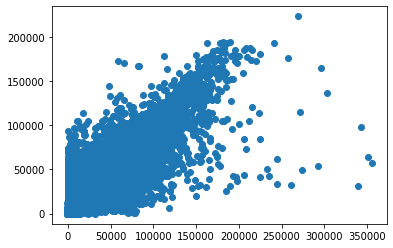

In [35]:
plt.scatter(y_test,y_pred)
plt.show()

In [37]:
accuracy = knn.score(X_test,y_test)
accuracy

0.8319277398879221

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [39]:
accuracy2=dt.score(X_test,y_test)
accuracy2

0.7855597835267596

Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [50]:
accuracy3=rfr.score(X_test,y_test)
accuracy3

0.6336050299553297

In [58]:
from prettytable import PrettyTable

table=PrettyTable()
table.field_names= ["Model","Accuracy"]
table.add_row(["KNN Regressor",round(accuracy*100,2)])
table.add_row(["Desicion Tree",round(accuracy2*100,2)])
table.add_row(["Random Forest",round(accuracy3*100,2)])
print(table)

+---------------+----------+
|     Model     | Accuracy |
+---------------+----------+
| KNN Regressor |  83.19   |
| Desicion Tree |  63.36   |
| Random Forest |  63.36   |
+---------------+----------+
